In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [93]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [11]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [129]:
html_data = requests.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm').text
soup = BeautifulSoup(html_data, 'html.parser')
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find('tbody').find_all('tr'):
    col = row.find_all('td')
    date = col[0].text
    revenue = col[1].text
    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
print(tesla_revenue.tail(5))

<>:9: SyntaxWarning:

invalid escape sequence '\$'

<>:9: SyntaxWarning:

invalid escape sequence '\$'

C:\Users\bolad\AppData\Local\Temp\ipykernel_123752\1384976543.py:9: SyntaxWarning:

invalid escape sequence '\$'



    Date  Revenue
8   2013   2013.0
9   2012    413.0
10  2011    204.0
11  2010    117.0
12  2009    112.0


In [49]:
GameStop = yf.Ticker('GME')
gme_data = GameStop.history(period = "max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [123]:
html_data_2 = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html").text
s = BeautifulSoup(html_data_2, "html.parser")
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find('tbody').find_all('tr'):
    col = row.find_all('td')
    date = col[0].text
    revenue = col[1].text
    gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)
gme_revenue.dropna(inplace=True)
gme_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
print(gme_revenue.tail(5))

<>:9: SyntaxWarning:

invalid escape sequence '\$'

<>:9: SyntaxWarning:

invalid escape sequence '\$'

C:\Users\bolad\AppData\Local\Temp\ipykernel_123752\1669229607.py:9: SyntaxWarning:

invalid escape sequence '\$'



    Date  Revenue
8   2013   2013.0
9   2012    413.0
10  2011    204.0
11  2010    117.0
12  2009    112.0


In [67]:
tesla_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...,...
3612,2024-11-04 00:00:00-05:00,244.559998,248.899994,238.880005,242.839996,68802400,0.0,0.0
3613,2024-11-05 00:00:00-05:00,247.339996,255.279999,246.210007,251.440002,69282500,0.0,0.0
3614,2024-11-06 00:00:00-05:00,284.670013,289.589996,275.619995,288.529999,165228700,0.0,0.0
3615,2024-11-07 00:00:00-05:00,288.890015,299.750000,285.519989,296.910004,117309200,0.0,0.0


In [115]:
tesla_revenue

,Date,Revenue
0,2021,"53,823"
1,2020,"31,536"
2,2019,"24,578"
3,2018,"21,461"
4,2017,"11,759"
5,2016,"7,000"
6,2015,"4,046"
7,2014,"3,198"
8,2013,"2,013"
9,2012,413


In [75]:
tesla_data_specific = tesla_data[tesla_data.Date <= '2021-06-14']
tesla_data_specific

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...,...
2754,2021-06-08 00:00:00-04:00,207.669998,207.696671,198.500000,201.196671,78160200,0.0,0.0
2755,2021-06-09 00:00:00-04:00,200.723328,203.929993,199.210007,199.593338,49753800,0.0,0.0
2756,2021-06-10 00:00:00-04:00,201.293335,205.529999,200.166672,203.373337,71758800,0.0,0.0
2757,2021-06-11 00:00:00-04:00,203.410004,204.186661,200.506668,203.296661,48615900,0.0,0.0


C:\Users\bolad\AppData\Local\Temp\ipykernel_123752\2068038883.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\bolad\AppData\Local\Temp\ipykernel_123752\2068038883.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



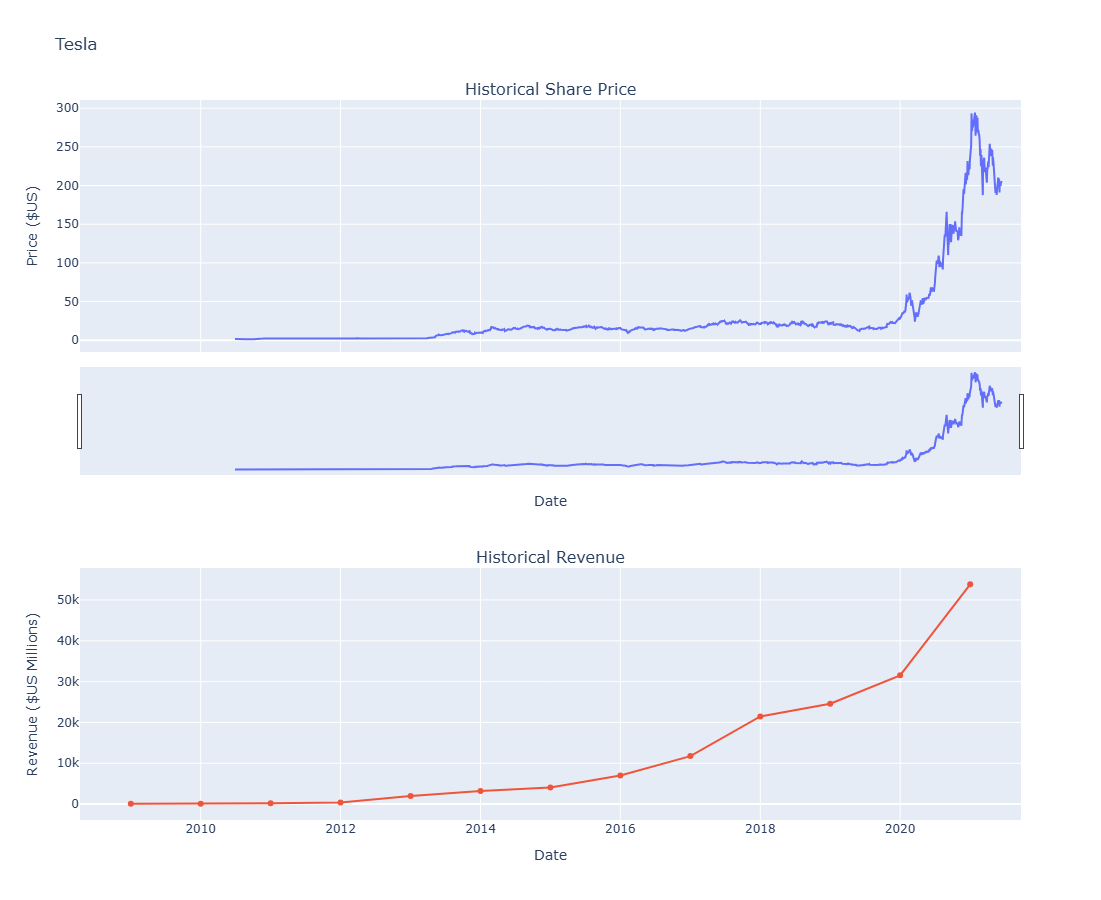

In [125]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

C:\Users\bolad\AppData\Local\Temp\ipykernel_123752\2068038883.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\bolad\AppData\Local\Temp\ipykernel_123752\2068038883.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



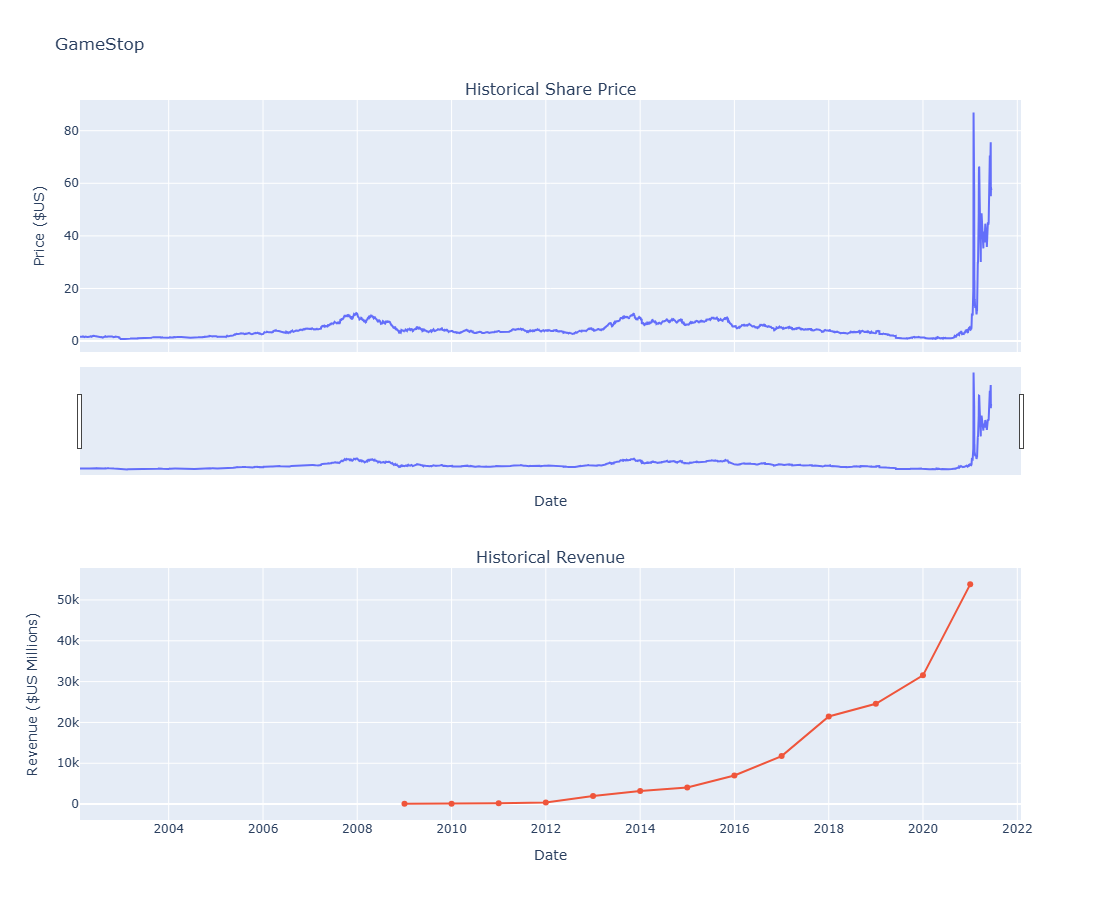

In [127]:
make_graph(gme_data, gme_revenue, 'GameStop')